![U of C Header](header.png)

<center>
    <h1>Laboratory Experiment #3</h1>
    <h2>Biometric-based verification: Signature</h2>
</center>

## Introduction

The purpose of this laboratory is to become familiar with processing aqiured biometric data such as genuine and impostor signatures. Students will also gain experience with file I/O in python. Data will be seperated into two sets, a training set and a classification set. Scores will be calculated using **Gaussian Mixture Model**, a weighted sum of gaussian probability density functions.

In [310]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [311]:
## the following code will point to the desired genuine and impostor datasets

genuine_dir = "./signature_samples/hello/genuine/"
impostor_dir = "./signature_samples/hello/impostor/"
impostor_dir_two = "./signature_samples/biometrics/impostor/"

In [312]:
## signatures will then be imported and prepared for processing
total_signatures = 30
total_gen_signatures = total_signatures
total_imp_signatures = total_signatures
total_imp_signatures_two = total_signatures

auth_arr = []
imp_arr = []
imp_arr2 = []

for i in range(total_signatures):
    #columns: [X, Y, Pressure, Time]
    csv_gen = pd.read_csv(genuine_dir + "%d.csv" % (i+1))
    csv_imp = pd.read_csv(impostor_dir + "%d.csv" % (i+1))
    csv_imp_two = pd.read_csv(impostor_dir_two + "%d.csv" % (i+1))
    
    auth_arr.append(csv_gen.values)
    imp_arr.append(csv_imp.values)
    imp_arr2.append(csv_imp_two.values)

In [313]:
print('Size of the "auth_arr" vector: %d' % (len(auth_arr)))
print('Size of the "imp_arr" vector: %d' % (len(imp_arr)))
print('Size of the "imp_arr_two" vector: %d' % (len(imp_arr2)))

Size of the "auth_arr" vector: 30
Size of the "imp_arr" vector: 30
Size of the "imp_arr_two" vector: 30


## Exercise 1

In [314]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 10
NUMTRAININGPATTERNS2 = 15
NUMTRAININGPATTERNS3 = 20
NUMTRAININGPATTERNS4 = 25

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 20
NUMGCOMPONENTS2 = 40
NUMGCOMPONENTS3 = 60
NUMGCOMPONENTS4 = 80

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set1 = np.reshape(auth_arr[0], (-1,4))
train_set2 = np.reshape(auth_arr[0], (-1,4))
train_set3 = np.reshape(auth_arr[0], (-1,4))
train_set4 = np.reshape(auth_arr[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample1 = np.reshape(auth_arr[i], (-1,4))
    train_set1 = np.concatenate((train_set1, sample1), axis=0)
    
for i in range(1,NUMTRAININGPATTERNS2):
    # taking from authentic/genuine
    sample2 = np.reshape(auth_arr[i], (-1,4))
    train_set2 = np.concatenate((train_set2, sample2), axis=0)
    
for i in range(1,NUMTRAININGPATTERNS3):
    # taking from authentic/genuine
    sample3 = np.reshape(auth_arr[i], (-1,4))
    train_set3 = np.concatenate((train_set3, sample3), axis=0)
    
for i in range(1,NUMTRAININGPATTERNS4):
    # taking from authentic/genuine
    sample4 = np.reshape(auth_arr[i], (-1,4))
    train_set4 = np.concatenate((train_set4, sample4), axis=0)

In [315]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d, %d, %d, and %d signatures from each set' % (NUMTRAININGPATTERNS, NUMTRAININGPATTERNS2, NUMTRAININGPATTERNS3, NUMTRAININGPATTERNS4))
print('and the number of Gaussian mixture components for each set is %d, %d, %d, %d' % (NUMGCOMPONENTS, NUMGCOMPONENTS2, NUMGCOMPONENTS3, NUMGCOMPONENTS4))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 10, 15, 20, and 25 signatures from each set
and the number of Gaussian mixture components for each set is 20, 40, 60, 80


In [316]:
## training the model
gmm = GaussianMixture(n_components = NUMGCOMPONENTS).fit(train_set1)
gmm2 = GaussianMixture(n_components = NUMGCOMPONENTS2).fit(train_set2)
gmm3 = GaussianMixture(n_components = NUMGCOMPONENTS3).fit(train_set3)
gmm4 = GaussianMixture(n_components = NUMGCOMPONENTS4).fit(train_set4)

In [317]:
gScores1 = []
gScores2 = []
gScores3 = []
gScores4 = []

## first 20 entries are used for training, this loops through the final 10 entries
for i in range(NUMTRAININGPATTERNS, total_signatures):
    sample1 = np.reshape(auth_arr[i], (-1, 4))
    ## calculate the per-sample average log-likelihood of given data
    score1 = gmm.score(sample1)  
    ## add score to the list of scores
    gScores1.append(score1)

for i in range(NUMTRAININGPATTERNS2, total_signatures):
    sample2 = np.reshape(auth_arr[i], (-1, 4))
    ## calculate the per-sample average log-likelihood of given data
    score2 = gmm2.score(sample2)
    ## add score to the list of scores
    gScores2.append(score2)
    
for i in range(NUMTRAININGPATTERNS3, total_signatures): 
    sample3 = np.reshape(auth_arr[i], (-1, 4)) 
    ## calculate the per-sample average log-likelihood of given data
    score3 = gmm3.score(sample3)
    ## add score to the list of scores
    gScores3.append(score3)
    
for i in range(NUMTRAININGPATTERNS4, total_signatures):   
    sample4 = np.reshape(auth_arr[i], (-1, 4))    
    ## calculate the per-sample average log-likelihood of given data
    score4 = gmm4.score(sample4)    
    ## add score to the list of scores
    gScores4.append(score4)

In [318]:
iScores1 = []
iScores2 = []
iScores3 = []
iScores4 = []

## first 10 entries are used for training, this loops through the final 20 entries
for i in range(NUMTRAININGPATTERNS, total_signatures):
    sample1 = np.reshape(imp_arr[i], (-1, 4))
    ## calculate the per-sample average log-likelihood of given data
    score1 = gmm.score(sample1)  
    ## add score to the list of scores
    iScores1.append(score1)

## first 15 entries are used for training, this loops through the final 15 entries
for i in range(NUMTRAININGPATTERNS2, total_signatures):
    sample2 = np.reshape(imp_arr[i], (-1, 4))
    ## calculate the per-sample average log-likelihood of given data
    score2 = gmm2.score(sample2)
    ## add score to the list of scores
    iScores2.append(score2)
          
## first 20 entries are used for training, this loops through the final 10 entries    
for i in range(NUMTRAININGPATTERNS3, total_signatures): 
    sample3 = np.reshape(imp_arr[i], (-1, 4)) 
    ## calculate the per-sample average log-likelihood of given data
    score3 = gmm3.score(sample3)
    ## add score to the list of scores
    iScores3.append(score3)
    
## first 25 entries are used for training, this loops through the final 5 entries
for i in range(NUMTRAININGPATTERNS4, total_signatures):   
    sample4 = np.reshape(imp_arr[i], (-1, 4))    
    ## calculate the per-sample average log-likelihood of given data
    score4 = gmm4.score(sample4)
    ## add score to the list of scores
    iScores4.append(score4)

In [319]:
## calculating the mean and standard deviation of the scores for both genuine and impostor sets 

## Genuine mean and standard deviation 1
gen_mean1 = np.mean(gScores1)
gen_std1 = np.std(gScores1)

## Impostor mean and standard deviation 1
imp_mean1 = np.mean(iScores1)
imp_std1 = np.std(iScores1)

## Genuine mean and standard deviation 2
gen_mean2 = np.mean(gScores2)
gen_std2 = np.std(gScores2)

## Impostor mean and standard deviation 2
imp_mean2 = np.mean(iScores2)
imp_std2 = np.std(iScores2)

## Genuine mean and standard deviation 3
gen_mean3 = np.mean(gScores3)
gen_std3 = np.std(gScores3)

## Impostor mean and standard deviation 3
imp_mean3 = np.mean(iScores3)
imp_std3 = np.std(iScores3)

## Genuine mean and standard deviation 4
gen_mean4 = np.mean(gScores4)
gen_std4 = np.std(gScores4)

## Impostor mean and standard deviation 4
imp_mean4 = np.mean(iScores4)
imp_std4 = np.std(iScores4)

print('Average of genuine scores set 1: %.4f' % (gen_mean1))
print('Average of forgery scores set 1: %.4f' % (imp_mean1))
print('Average of genuine scores set 2: %.4f' % (gen_mean2))
print('Average of forgery scores set 2: %.4f' % (imp_mean2))
print('Average of genuine scores set 3: %.4f' % (gen_mean3))
print('Average of forgery scores set 3: %.4f' % (imp_mean3))
print('Average of genuine scores set 4: %.4f' % (gen_mean4))
print('Average of forgery scores set 4: %.4f' % (imp_mean4))

print('Standard deviation of genuine scores set 1: %.4f' % (gen_std1))
print('Standard deviation of forgery scores set 1: %.4f' % (imp_std1))
print('Standard deviation of genuine scores set 2: %.4f' % (gen_std2))
print('Standard deviation of forgery scores set 2: %.4f' % (imp_std2))
print('Standard deviation of genuine scores set 3: %.4f' % (gen_std3))
print('Standard deviation of forgery scores set 3: %.4f' % (imp_std3))
print('Standard deviation of genuine scores set 4: %.4f' % (gen_std4))
print('Standard deviation of forgery scores set 4: %.4f' % (imp_std4))

Average of genuine scores set 1: -19.7060
Average of forgery scores set 1: -596.5796
Average of genuine scores set 2: -21.0793
Average of forgery scores set 2: -255.3289
Average of genuine scores set 3: -22.5586
Average of forgery scores set 3: -612.9774
Average of genuine scores set 4: -23.0912
Average of forgery scores set 4: -300.4776
Standard deviation of genuine scores set 1: 3.0806
Standard deviation of forgery scores set 1: 357.8255
Standard deviation of genuine scores set 2: 3.9067
Standard deviation of forgery scores set 2: 74.9370
Standard deviation of genuine scores set 3: 4.2160
Standard deviation of forgery scores set 3: 282.3261
Standard deviation of genuine scores set 4: 3.2832
Standard deviation of forgery scores set 4: 79.2307


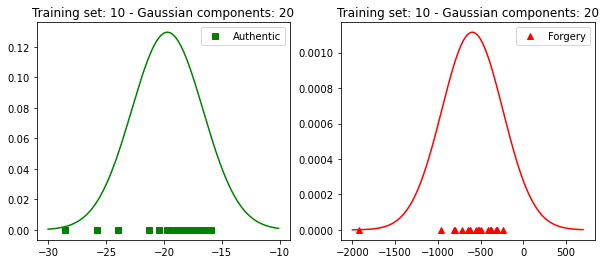

In [336]:
## Plots for the first set, 10 gen components training set = 10
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-30, -10, 0.1)
gen_Prob1 = norm.pdf(x, loc=gen_mean1, scale=gen_std1)

plt.subplot(1,2,1)
plt.plot(x, gen_Prob1, 'g')
plt.plot(gScores1, np.zeros(len(gScores1)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-2000, 700, 0.01)
imp_Prob1 = norm.pdf(x, loc=imp_mean1, scale=imp_std1)

plt.subplot(1,2,2)
plt.plot(x, imp_Prob1, 'r')
plt.plot(iScores1, np.zeros(len(iScores1)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

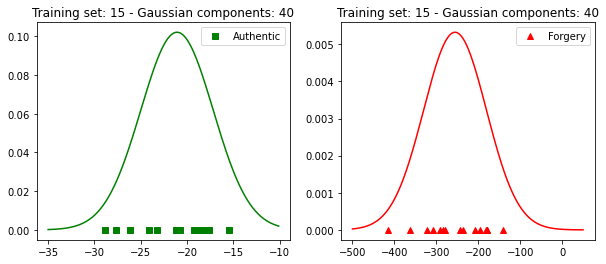

In [335]:
## Plots for the second set, 15 gen components training set = 15
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-35, -10, 0.1)
gen_Prob2 = norm.pdf(x, loc=gen_mean2, scale=gen_std2)

plt.subplot(1,2,1)
plt.plot(x, gen_Prob2, 'g')
plt.plot(gScores2, np.zeros(len(gScores2)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS2, NUMGCOMPONENTS2));


# Forged (impostor) set
x = np.arange(-500, 50, 0.01)
imp_Prob2 = norm.pdf(x, loc=imp_mean2, scale=imp_std2)

plt.subplot(1,2,2)
plt.plot(x, imp_Prob2, 'r')
plt.plot(iScores2, np.zeros(len(iScores2)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS2, NUMGCOMPONENTS2));

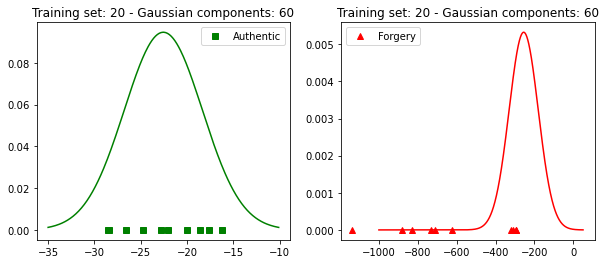

In [334]:
## Plots for the third set, 20 gen components training set = 20
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-35, -10, 0.1)
gen_Prob3 = norm.pdf(x, loc=gen_mean3, scale=gen_std3)

plt.subplot(1,2,1)
plt.plot(x, gen_Prob3, 'g')
plt.plot(gScores3, np.zeros(len(gScores3)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS3, NUMGCOMPONENTS3));


# Forged (impostor) set
x = np.arange(-1000, 50, 0.01)
imp_Prob3 = norm.pdf(x, loc=imp_mean2, scale=imp_std2)

plt.subplot(1,2,2)
plt.plot(x, imp_Prob3, 'r')
plt.plot(iScores3, np.zeros(len(iScores3)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS3, NUMGCOMPONENTS3));

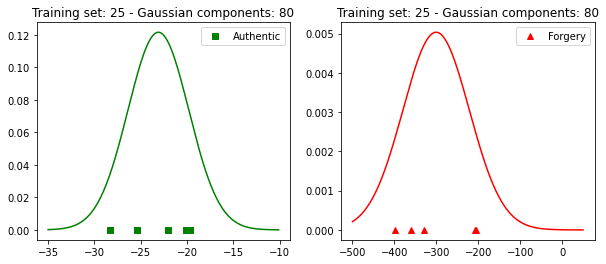

In [333]:
## Plots for the fourth set, 25 gen components training set = 25
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-35, -10, 0.1)
gen_Prob4 = norm.pdf(x, loc=gen_mean4, scale=gen_std4)

plt.subplot(1,2,1)
plt.plot(x, gen_Prob4, 'g')
plt.plot(gScores4, np.zeros(len(gScores4)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS4, NUMGCOMPONENTS4));


# Forged (impostor) set
x = np.arange(-500, 50, 0.01)
imp_Prob4 = norm.pdf(x, loc=imp_mean4, scale=imp_std4)

plt.subplot(1,2,2)
plt.plot(x, imp_Prob4, 'r')
plt.plot(iScores4, np.zeros(len(iScores4)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS4, NUMGCOMPONENTS4));

**Analysis**

In general, it seems that increasing the test sample size and number of gaussian components seems to slightly increase the mean of the genuine set. The scores of the genuine set seem to be less scattered than those of the impostor set.

## Exercise 2

In [324]:
iScores5 = []
iScores6 = []
iScores7 = []
iScores8 = []

## first 10 entries are used for training, this loops through the final 20 entries
for i in range(NUMTRAININGPATTERNS, total_signatures):
    sample5 = np.reshape(imp_arr2[i], (-1, 4))
    ## calculate the per-sample average log-likelihood of given data
    score5 = gmm.score(sample5)  
    ## add score to the list of scores
    iScores5.append(score5)

## first 15 entries are used for training, this loops through the final 15 entries
for i in range(NUMTRAININGPATTERNS2, total_signatures):
    sample6 = np.reshape(imp_arr2[i], (-1, 4))
    ## calculate the per-sample average log-likelihood of given data
    score6 = gmm2.score(sample6)
    ## add score to the list of scores
    iScores6.append(score6)
          
## first 20 entries are used for training, this loops through the final 10 entries    
for i in range(NUMTRAININGPATTERNS3, total_signatures): 
    sample7 = np.reshape(imp_arr2[i], (-1, 4)) 
    ## calculate the per-sample average log-likelihood of given data
    score7 = gmm3.score(sample7)
    ## add score to the list of scores
    iScores7.append(score7)
    
## first 25 entries are used for training, this loops through the final 5 entries
for i in range(NUMTRAININGPATTERNS4, total_signatures):   
    sample8 = np.reshape(imp_arr2[i], (-1, 4))    
    ## calculate the per-sample average log-likelihood of given data
    score8 = gmm4.score(sample8)
    ## add score to the list of scores
    iScores8.append(score8)

In [325]:
## calculating the mean and standard deviation of the scores for both genuine and impostor sets 

## Impostor mean and standard deviation 1
imp_mean5 = np.mean(iScores5)
imp_std5 = np.std(iScores5)

## Impostor mean and standard deviation 2
imp_mean6 = np.mean(iScores6)
imp_std6 = np.std(iScores6)

## Impostor mean and standard deviation 3
imp_mean7 = np.mean(iScores7)
imp_std7 = np.std(iScores7)

## Impostor mean and standard deviation 4
imp_mean8 = np.mean(iScores8)
imp_std8 = np.std(iScores8)

print('Average of forgery scores set 1: %.4f' % (imp_mean5))
print('Average of forgery scores set 2: %.4f' % (imp_mean6))
print('Average of forgery scores set 3: %.4f' % (imp_mean7))
print('Average of forgery scores set 4: %.4f' % (imp_mean8))

print('Standard deviation of forgery scores set 1: %.4f' % (imp_std5))
print('Standard deviation of forgery scores set 2: %.4f' % (imp_std6))
print('Standard deviation of forgery scores set 3: %.4f' % (imp_std7))
print('Standard deviation of forgery scores set 4: %.4f' % (imp_std8))

Average of forgery scores set 1: -2363.1748
Average of forgery scores set 2: -1750.3301
Average of forgery scores set 3: -2510.9624
Average of forgery scores set 4: -1190.1384
Standard deviation of forgery scores set 1: 991.1791
Standard deviation of forgery scores set 2: 986.9169
Standard deviation of forgery scores set 3: 1194.4739
Standard deviation of forgery scores set 4: 684.5748


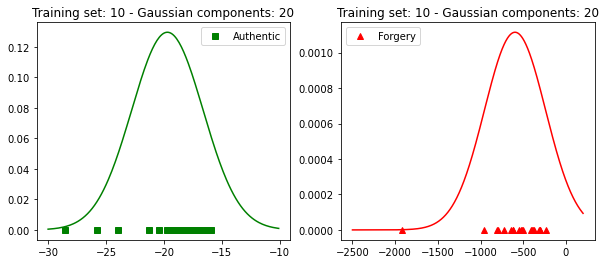

In [326]:
## Plots for the first set, 10 gen components training set = 10
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-30, -10, 0.1)
gen_Prob1 = norm.pdf(x, loc=gen_mean1, scale=gen_std1)

plt.subplot(1,2,1)
plt.plot(x, gen_Prob1, 'g')
plt.plot(gScores1, np.zeros(len(gScores1)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-2500, 200, 0.01)
imp_Prob1 = norm.pdf(x, loc=imp_mean1, scale=imp_std1)

plt.subplot(1,2,2)
plt.plot(x, imp_Prob1, 'r')
plt.plot(iScores1, np.zeros(len(iScores1)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

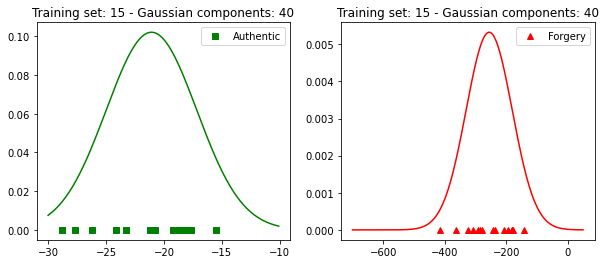

In [330]:
## Plots for the second set, 15 gen components training set = 15
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-30, -10, 0.1)
gen_Prob2 = norm.pdf(x, loc=gen_mean2, scale=gen_std2)

plt.subplot(1,2,1)
plt.plot(x, gen_Prob2, 'g')
plt.plot(gScores2, np.zeros(len(gScores2)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS2, NUMGCOMPONENTS2));


# Forged (impostor) set
x = np.arange(-700, 50, 0.01)
imp_Prob2 = norm.pdf(x, loc=imp_mean2, scale=imp_std2)

plt.subplot(1,2,2)
plt.plot(x, imp_Prob2, 'r')
plt.plot(iScores2, np.zeros(len(iScores2)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS2, NUMGCOMPONENTS2));

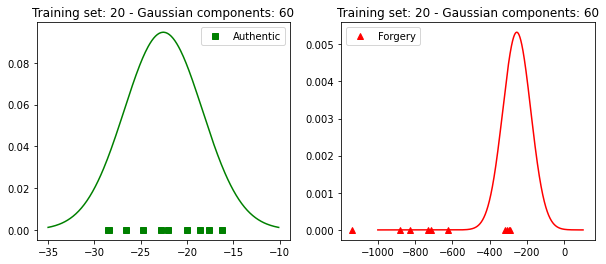

In [331]:
## Plots for the third set, 20 gen components training set = 20
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-35, -10, 0.1)
gen_Prob3 = norm.pdf(x, loc=gen_mean3, scale=gen_std3)

plt.subplot(1,2,1)
plt.plot(x, gen_Prob3, 'g')
plt.plot(gScores3, np.zeros(len(gScores3)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS3, NUMGCOMPONENTS3));


# Forged (impostor) set
x = np.arange(-1000, 100, 0.01)
imp_Prob3 = norm.pdf(x, loc=imp_mean2, scale=imp_std2)

plt.subplot(1,2,2)
plt.plot(x, imp_Prob3, 'r')
plt.plot(iScores3, np.zeros(len(iScores3)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS3, NUMGCOMPONENTS3));

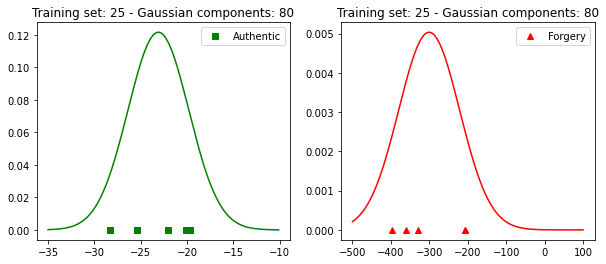

In [332]:
## Plots for the fourth set, 25 gen components training set = 25
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-35, -10, 0.1)
gen_Prob4 = norm.pdf(x, loc=gen_mean4, scale=gen_std4)

plt.subplot(1,2,1)
plt.plot(x, gen_Prob4, 'g')
plt.plot(gScores4, np.zeros(len(gScores4)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS4, NUMGCOMPONENTS4));


# Forged (impostor) set
x = np.arange(-500, 100, 0.01)
imp_Prob4 = norm.pdf(x, loc=imp_mean4, scale=imp_std4)

plt.subplot(1,2,2)
plt.plot(x, imp_Prob4, 'r')
plt.plot(iScores4, np.zeros(len(iScores4)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS4, NUMGCOMPONENTS4));

**Comparison**

Compared to the previous exercies, the genuine distributions as the set remain the same, however, after using an impostor set that reflects a different word altogether, it is evident that in general, the impostor distributions of the previous exercise span less, and the average score of each imposter set is significantly higher than those of the previous exercise

## Exercise 3

![solution](Ex3.jpg)

## Conclusion

In conclusion, after analyzing the results of the FRR and FAR, the type 1 error (FRR) is predetermined by the significance level assigned. The FAR however, is influenced by the assigned significance level. When type 1 error is increased the type 2 error also increases. Initially we assign the type one error as 0.05 meaning that 5% of matches will indicate that the mean = -21.83 when the mean does not actually fall in the confidence interval indicated above. The FAR being 1.39% means that 1.39% of the matches would fail to reject the null hypothesis when it is false. To change the critical values, we change the significance level to 0.1. This means that 10% of matches will indicate that the mean = -21.83 when the mean does not fall into the new confidence interval determined by the significance level. The FAR then increases to 15.87%, these are the matches that will indicate that the mean = -21.83 even when the mean does not fall in the 90% confidence interval.